We set up the potential energy as follows:
$$
V(x) = \begin{cases} \infty, &x\leq0\\
  0,  &0<x\leq L\\
  V_0, &x>L \end{cases}
  $$

We then discretize the schrodinger equation for use in a simple euler method:
$$
\psi(x,t+dt) = \psi(x,t) + dt*\left(i\frac{\hbar}{2ma^2}\mathbf{M}\psi(x,t) - \frac{i}{\hbar}V(x)\psi(x,t)\right)
$$

wher $M$ is our stiffness matrix as shown below and $a$ is the distance between oscillators.

In [32]:
import numpy as np
import matplotlib.pyplot as plt

#Setup Variables
hbar = 0.01
m = 1
a = 0.1 #space between oscillators
num_osc = 200 #number of oscillators
x0 = 5

V0 = 0.01 #well potential 

osc_pos = a*np.arange(0, num_osc, 1) #oscillator position, essentially x-axis variable

t_max = 100
dt = 0.001
t_values = np.arange(0, t_max, dt)

disp = np.zeros((num_osc, len(t_values)), dtype=complex)

In [33]:
#Initial Condition Gaussian wave packet
disp[:, 0] = np.exp(-(osc_pos - x0)**2/(2*((num_osc*a)/10)**2))

In [34]:
#Stiffness Matrix
main_diag = 2 * np.ones(num_osc)
off_diag = -1 * np.ones(num_osc - 1)
stiffness = (hbar / (m * a ** 2)) * (np.diag(main_diag) + np.diag(off_diag, -1) + np.diag(off_diag, 1))

In [35]:
#Potential Energy
V = np.zeros(num_osc)
V[int(num_osc/2):] = V0

In [36]:
# Euler update
for i in range(len(t_values) - 1):
    disp[:, i + 1] = disp[:, i] + dt*(((1j * hbar)/(m*a**2))*stiffness @ disp[:, i] - (1j/hbar)*V*disp[:, i])

absdisp = np.absolute(disp)

Shows how an initial wave can transfer energy and create oscillations in a classically forbidden region.

/opt/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


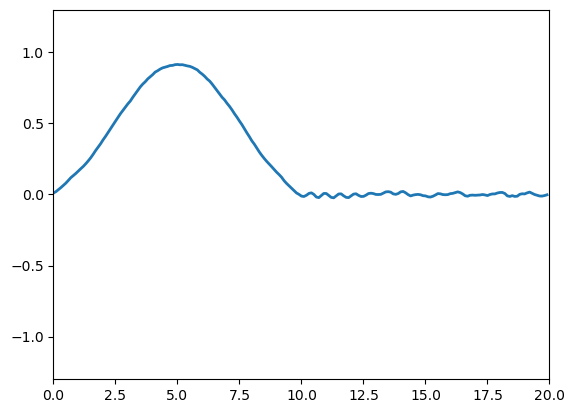

In [37]:
#Simulation
from matplotlib import animation
from IPython.display import HTML

x_max = a*num_osc

y_max = 1.3 

fig = plt.figure()
ax = plt.axes(xlim=(0, x_max), ylim=(-y_max, y_max))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(osc_pos, disp[:,i])
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                              frames=range(0,int(t_max/dt),int(1/dt)), interval=100, blit=True)

HTML(anim.to_html5_video())